# Tprofile 2Poly Realistic Module Error
Simulate faulty detector panel w.r.t. particle charge




**Author:** Filip Ilic  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:59 AM.</small></i>

In [1]:
%%cpp -d
#include <iostream>
#include <fstream>
using namespace std;

 Arguments are defined. 

In [2]:
Int_t numEvents = 1000000;

In [3]:
TCanvas *c1 = new TCanvas("c1", "4 Malfunctioning Panels", 800, 400);
c1->Divide(3, 1);

-------------------- construct detector bins ------------------------

In [4]:
auto th2p = new TH2Poly();
auto avg = new TProfile2Poly();
auto err = new TProfile2Poly();

ifstream infile;
TString dir = gROOT->GetTutorialDir();
dir.Append("/hist/data/tprofile2poly_tutorial.data");
infile.open(dir.Data());

if (!infile) // Verify that the file was open successfully
{
   std::cerr << dir.Data() << std::endl; // Report error
   std::cerr << "Error code: " << strerror(errno) << std::endl; // Get some info as to why
   return;
}

vector<pair<Double_t, Double_t>> allCoords;
Double_t a, b;
while (infile >> a >> b) {
   pair<Double_t, Double_t> coord(a, b);
   allCoords.push_back(coord);
}

if (allCoords.size() % 3 != 0) {
   cout << "[ERROR] Bad file" << endl;
   return;
}

Double_t x[3], y[3];
for (Int_t i = 0; i < allCoords.size(); i += 3) {
   x[0] = allCoords[i + 0].first;
   y[0] = allCoords[i + 0].second;
   x[1] = allCoords[i + 1].first;
   y[1] = allCoords[i + 1].second;
   x[2] = allCoords[i + 2].first;
   y[2] = allCoords[i + 2].second;
   th2p->AddBin(3, x, y);
   avg->AddBin(3, x, y);
   err->AddBin(3, x, y);
}

-------------------- generate particles ------------------------

In [5]:
TRandom ran;
for (int j = 0; j < numEvents; ++j) {
   Double_t r1 = ran.Gaus(0, 10);
   Double_t r2 = ran.Gaus(0, 8);
   Double_t rok = ran.Gaus(20, 2);
   Double_t rbad1 = ran.Gaus(1, 2);
   Double_t rbad2 = ran.Gaus(2, 0);

   Double_t val = rok;
   // --------------------  Malfunctioning panels -------------------
   if (th2p->IsInsideBin(4, r1, r2)) val = rok - rbad1;
   if (th2p->IsInsideBin(20, r1, r2)) val = rok - rbad2;
   if (th2p->IsInsideBin(13, r1, r2)) val = rok + rbad1;
   if (th2p->IsInsideBin(37, r1, r2)) val = rok + rbad2;

   // -------------------- Fill histograms ------------------------
   th2p->Fill(r1, r2, val);
   avg->Fill(r1, r2, val);
   err->Fill(r1, r2, val);
}

-------------------- display end state ------------------------

In [6]:
c1->cd(1);
th2p->SetStats(0);
th2p->SetTitle("total hits");
th2p->Draw("COLZ");

c1->cd(2);
avg->SetStats(0);
avg->SetTitle("average charge");
avg->Draw("COLZ");

c1->cd(3);
err->SetStats(0);
err->SetContentToError();
err->SetTitle("error");
err->Draw("COLZ");

Draw all canvases 

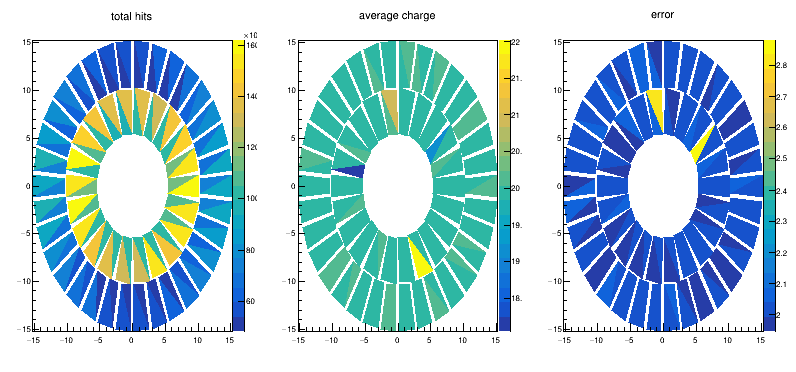

In [7]:
gROOT->GetListOfCanvases()->Draw()